In [146]:
#https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f?source=email-a0121b3f4ae6-1581059935521-digest.reader------1-49------------------f7994caa_fc9e_44db_9e99_7057731f6b14-1-----
    
# import libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats

import pymc3 as pm3
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [150]:
# generate data
N = 100
x = np.linspace(0,20,N)
e = np.random.normal(loc = 0.0, scale = 2, size = N)
y = 4*x + 1 + e
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 5

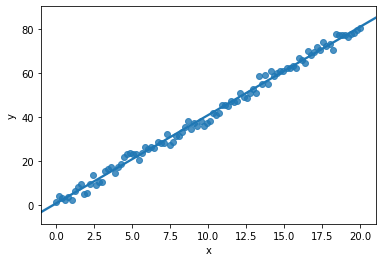

In [151]:
# plot
sns.regplot(df.x, df.y);

In [152]:
# split features and target
X = df[['constant', 'x']]# fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.515e+04
Date:                Sat, 07 Mar 2020   Prob (F-statistic):          3.20e-109
Time:                        09:15:10   Log-Likelihood:                -205.25
No. Observations:                 100   AIC:                             414.5
Df Residuals:                      98   BIC:                             419.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.1325      0.076      1.753      0.083      -0.017       0.282
x              4.0169      0.033    123.069      0.000       3.952       4.082
==============================================================================
Omnibus:                        4.014   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                2.342
Skew:                           0.130   Prob(JB):                        0.310
Kurtosis:                       2.297   Cond. No.                         5.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
# define likelihood function
def MLERegression(params):
    intercept, beta, sd= params[0], params[1], params[2] # inputs are guesses at our parameters
    yhat = intercept + beta*x # predictions
    # next, we flip the Bayesian question
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )# return negative LL
    return(negLL)

In [154]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([5,5,2])
results = minimize(
    MLERegression,
    guess,
    method = 'Nelder-Mead', 
    options={'disp': True}
)

Optimization terminated successfully.
         Current function value: 205.245697
         Iterations: 112
         Function evaluations: 196


In [155]:
resultsdf = pd.DataFrame({'coef':results['x']})
resultsdf.index=['constant','x','sigma']   
np.round(resultsdf.head(2), 4)

,coef
constant,0.6623
x,4.0169


In [156]:
results['x']

array([0.66229403, 4.01687217, 1.88421395])

# Maximum likelihood estimation - Logistics Regression

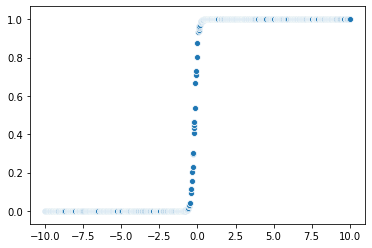

In [131]:
# generate data
N = 1000
x = np.random.uniform(-10, 10, N)
x.sort()

a, b = 10, 2
y = 1 / (1 + np.exp(-(a*x + b)))

sns.scatterplot(x, y)

In [132]:
# define likelihood function
def MLERegression(params):
    epsilon = 0.000001
    a_test = params[0]
    b_test = params[1]
    pi = 1 / (1 + np.exp(-(a_test*x + b_test)))
    
    ll = np.sum(y*np.log(pi + epsilon) + (1 - y)*np.log(1 - pi  + epsilon))
    print(ll)
    return(-ll)

In [133]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([6,0])
results = minimize(
    MLERegression,
    guess,
    method = 'Nelder-Mead', 
    options={'disp': True}
)

-21.471303937968713
-21.305598734392166
-21.46911234539024
-21.303419445049887
-21.24377938420787
-21.17161997414363
-21.149506735415923
-21.156438362524398
-21.31893530128062
-21.159592432064898
-21.20801009501336
-21.14692504140559
-21.159045315862592
-21.149491606401536
-21.144387813975058
-21.142605440893718
-21.151474408854313
-21.14573886708816
-21.14199187544592
-21.141225974506913
-21.13601903889074
-21.13116882627496
-21.133514334995
-21.12145760220354
-21.111611427507437
-21.114152012096323
-21.092601239605116
-21.073474537322994
-21.073548506167132
-21.033764286457476
-20.995463533911618
-21.00276683367507
-20.924315401893672
-20.85237391777908
-20.842892881581843
-20.765555313753207
-20.62428365809904
-20.44802510602104
-20.358463634688917
-20.122375589211718
-19.826623495003812
-19.406202237461752
-19.096344383642045
-18.497215896020943
-17.967653856092713
-17.249295918938707
-16.58939907970792
-15.874637269470739
-16.416315261561344
-16.73517899357689
-16.10193297859968
-

In [134]:
results['x']

array([10.00076225,  2.00015957])